<h1 align="center"><strong>KNN code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
display(df.shape)
display(df.columns.tolist())

(768, 9)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [4]:
display(df.info(memory_usage='deep'))
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
display(df.nunique().sort_values(ascending=False))

DiabetesPedigreeFunction    517
BMI                         248
Insulin                     186
Glucose                     136
Age                          52
SkinThickness                51
BloodPressure                47
Pregnancies                  17
Outcome                       2
dtype: int64

In [6]:
display(df.isnull().sum().to_frame().rename(columns={0:'Total No. of Missing Values'}))

,Total No. of Missing Values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
display(df.duplicated().sum())

0

Balance Ratio: 1.87 (1.0 = perfectly balanced)


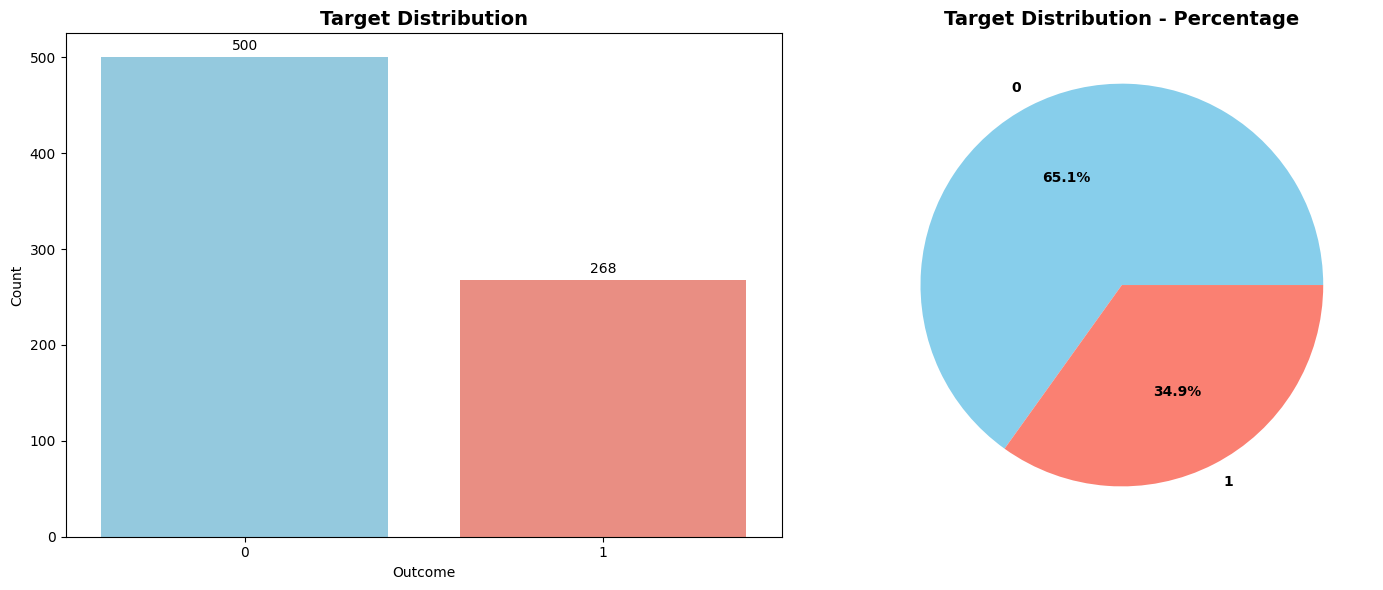

In [8]:
def target_distribution(df, target, task, title='Target Distribution', colors=('skyblue', 'salmon'), log_scale=False):
    if task == 'classification':
        counts = df[target].value_counts()
        balance_ratio = counts.max() / counts.min() if counts.min() > 0 else float('inf')
        print(f"Balance Ratio: {balance_ratio:.2f} (1.0 = perfectly balanced)")
        
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))
        
        # Barplot
        ax = axs[0]
        sns.barplot(x=counts.index, y=counts.values, hue=counts.index,palette=colors, legend=False, ax=ax)
        
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height()):,}",(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
            
        ax.set_title(title, fontsize=14, weight='bold')
        ax.set_xlabel(target)
        ax.set_ylabel('Count')
        if log_scale:
            ax.set_yscale('log')
        ax.tick_params(axis='x', rotation=0)
        
        # Pie chart
        ax2 = axs[1]
        ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%',colors=colors[:len(counts)],textprops={'fontweight': 'bold'}, explode=[0]*len(counts))
        ax2.set_title(f"{title} - Percentage", fontsize=14, weight='bold')
        
        plt.tight_layout()
        plt.show()
    
    elif task == 'regression':
        sns.set_theme()
        plt.figure(figsize=(8, 6))
        sns.histplot(df[target], kde=True, bins=30, color=colors[0])
        plt.title(title, fontsize=14, weight='bold')
        plt.xlabel(target)
        plt.ylabel('Count')
        if log_scale:
            plt.yscale('log')
        plt.show()

target_distribution(df, 'Outcome', task='classification', log_scale=None)

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")
print(f"\nMissing values:")
print(f"X_train : {X_train.isnull().sum().sum()}")
print(f"X_test  : {X_test.isnull().sum().sum()}")
print(f"y_train : {y_train.isnull().sum().sum()}")
print(f"y_test  : {y_test.isnull().sum().sum()}")

X_train shape: (614, 8)
X_test  shape: (154, 8)
y_train shape: (614,)
y_test  shape: (154,)

Missing values:
X_train : 0
X_test  : 0
y_train : 0
y_test  : 0


In [10]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts()

Outcome
0    400
1    400
Name: count, dtype: int64

In [11]:
def selective_scaling(X_train: pd.DataFrame, X_test: pd.DataFrame, threshold=100):
    # Only select numeric columns (exclude categorical/object)
    candidate_cols = [col for col in X_train.columns if not col.startswith("cat__high_card__") and pd.api.types.is_numeric_dtype(X_train[col])]
    
    range_per_col = (X_train[candidate_cols].max() - X_train[candidate_cols].min()).sort_values(ascending=False)
    display(range_per_col)
    
    cols_to_scale = range_per_col[range_per_col > threshold].index.tolist()
    print("Columns to scale:", cols_to_scale if cols_to_scale else "None ✅")
    
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled  = X_test.copy()
    
    if cols_to_scale:
        X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
        X_test_scaled[cols_to_scale]  = scaler.transform(X_test[cols_to_scale])
    return X_train_scaled, X_test_scaled, cols_to_scale, scaler

X_train, X_test, _, _ = selective_scaling(X_train, X_test)

Insulin                     744.000
Glucose                     199.000
BloodPressure               122.000
SkinThickness                99.000
BMI                          67.100
Age                          60.000
Pregnancies                  17.000
DiabetesPedigreeFunction      2.245
dtype: float64

Columns to scale: ['Insulin', 'Glucose', 'BloodPressure']


In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Evaluation results: KNN (k=5)
--------- Accuracy ---------
Training Accuracy : 0.7932
Testing  Accuracy : 0.6753
Balanced Accuracy : 0.6393
Difference        : 0.1178
⚠️ Possible overfitting detected!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.6404
F1 (Micro) : 0.6753

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       100
           1       0.54      0.52      0.53        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



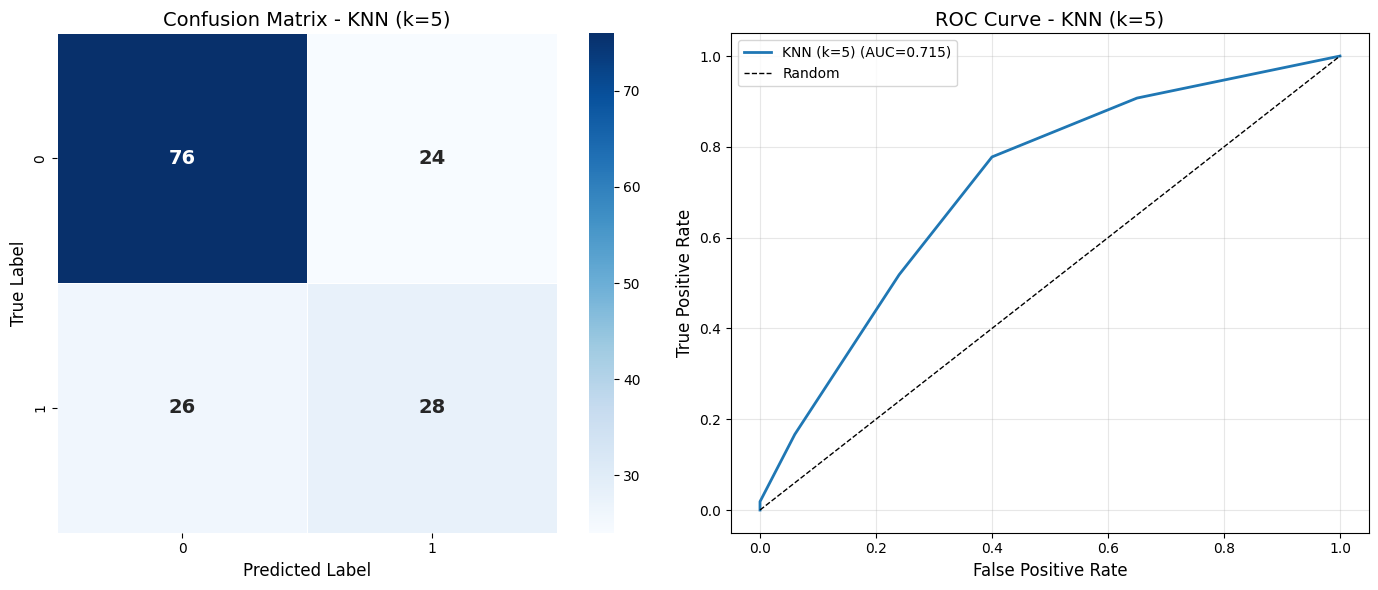

In [13]:
def classification_evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model", plot=True, verbose=True):
    import time
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import (accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score)
    start_time = time.time()
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    # Probabilities (if available)
    y_test_proba = None
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)
    
    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)
    bal_acc   = balanced_accuracy_score(y_test, y_test_pred)
    
    # Extra metrics
    f1_macro  = f1_score(y_test, y_test_pred, average="macro")
    f1_micro  = f1_score(y_test, y_test_pred, average="micro")
    
    end_time = time.time()
    elapsed  = end_time - start_time
    
    if verbose:
        print(f"{'='*60}")
        print(f"Evaluation results: {model_name}")
        print(f"{'='*60}")
        print(f"--------- Accuracy ---------")
        print(f"Training Accuracy : {train_acc:.4f}")
        print(f"Testing  Accuracy : {test_acc:.4f}")
        print(f"Balanced Accuracy : {bal_acc:.4f}")
        print(f"Difference        : {abs(train_acc - test_acc):.4f}")
        if abs(train_acc - test_acc) > 0.05:
            print("⚠️ Possible overfitting detected!")
        else:
            print("✅ Good generalization!")
        
        print(f"\n--------- Extra Metrics (Test Set) ---------")
        print(f"F1 (Macro) : {f1_macro:.4f}")
        print(f"F1 (Micro) : {f1_micro:.4f}")
        
        print(f"\n--------- Classification Report ---------")
        print(classification_report(y_test, y_test_pred))
    
    # Plots (subplot style)
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor='white',cbar=True, square=True, annot_kws={"size": 14, "weight": "bold"}, ax=axes[0])
        axes[0].set_xlabel("Predicted Label", fontsize=12)
        axes[0].set_ylabel("True Label", fontsize=12)
        axes[0].set_title(f"Confusion Matrix - {model_name}", fontsize=14)
        
        # ROC Curve
        auc = None
        if y_test_proba is not None:
            if y_test_proba.shape[1] == 2:  # Binary
                y_score = y_test_proba[:, 1]
                auc = roc_auc_score(y_test, y_score)
                fpr, tpr, _ = roc_curve(y_test, y_score)
                axes[1].plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC={auc:.3f})')
                axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
                axes[1].set_xlabel('False Positive Rate', fontsize=12)
                axes[1].set_ylabel('True Positive Rate', fontsize=12)
                axes[1].set_title(f'ROC Curve - {model_name}', fontsize=14)
                axes[1].legend()
                axes[1].grid(True, alpha=0.3)
            else:  # Multi-class
                auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr")
                axes[1].axis("off")
                axes[1].text(0.5, 0.5, f"Multi-class AUC (OVR): {auc:.3f}", ha="center", va="center", fontsize=14, weight="bold")
        else:
            axes[1].axis("off")
            axes[1].text(0.5, 0.5, "No Probabilities Available", ha="center", va="center", fontsize=12, style="italic")
        
        plt.tight_layout()
        plt.show()
    
    return {
        "train_acc": train_acc,
        "test_acc": test_acc,
        "bal_acc": bal_acc,
        "f1_macro": f1_macro,
        "f1_micro": f1_micro,
        "auc": auc,
        "time_sec": elapsed
    }

results = classification_evaluate_model(knn_model, X_train, X_test, y_train, y_test, model_name="KNN (k=5)", plot=True, verbose=True)

# **Grid search on KNN**

In [14]:
# Define the model
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(1, 31)}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,20


In [15]:
# Get the best parameter and the best score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Best K: {best_k}")
print(f"Best Cross-Validation ROC AUC: {best_score:.2f}")

Best K: 20
Best Cross-Validation ROC AUC: 0.75


In [16]:
# Train the model with the best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test)
y_pred_prob = best_knn.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70


Evaluation results: KNN (k=5)
--------- Accuracy ---------
Training Accuracy : 0.7231
Testing  Accuracy : 0.7013
Balanced Accuracy : 0.6294
Difference        : 0.0218
✅ Good generalization!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.6341
F1 (Micro) : 0.7013

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       100
           1       0.62      0.39      0.48        54

    accuracy                           0.70       154
   macro avg       0.67      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154



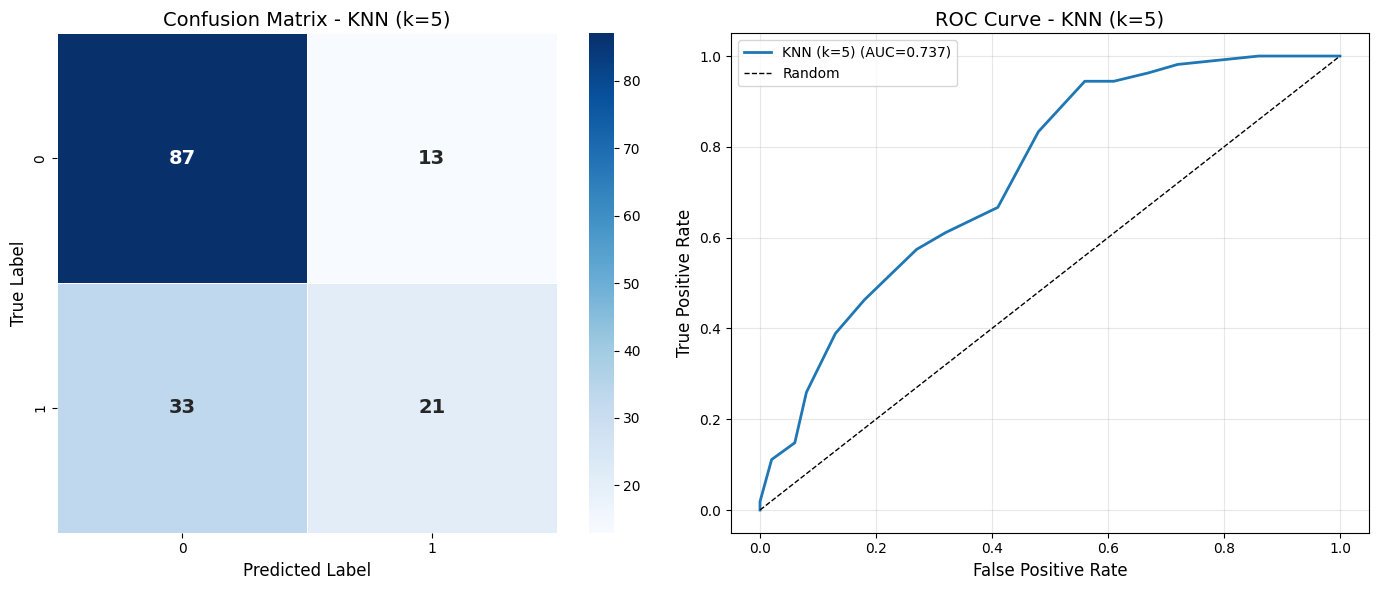

In [17]:
results = classification_evaluate_model(best_knn, X_train, X_test, y_train, y_test, model_name="KNN (k=5)", plot=True, verbose=True)

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **Another try to improve accuracy**

In [18]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

display(df.head())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

- SelectKBest:
```md
    1- SelectKBest is a feature selection method from the sklearn.feature_selection module. 
    2- It selects the top k features based on their scores. 
    3- The scores can be computed using different statistical tests. 
    4- This method helps in reducing the dimensionality of the dataset by selecting only the most relevant features, which can improve the performance of machine learning models by eliminating noise and redundant data.
```

---

- f_classif:
```md
    1- f_classif is a scoring function used with SelectKBest for performing ANOVA (Analysis of Variance) F-test for classification tasks. 
    2- It evaluates each feature individually by comparing the means of different classes and checking if they are significantly different. 
    3- Higher F-scores indicate that the feature has a strong relationship with the target variable.
```

---

- How SelectKBest and f_classif work together:
```md
    1- Compute F-scores: For each feature, the f_classif function computes an F-score and a corresponding p-value. 
    2- The F-score measures the degree of linear dependency between the feature and the target variable.
    3- Select Top Features: SelectKBest selects the top k features with the highest F-scores.
```

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
selector = selector.fit(X_train_smote, y_train_smote)
X_train_smote_selected = selector.transform(X_train_smote)
X_test_selected = selector.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up GridSearchCV with ROC AUC as the scoring metric
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')

# Fit the model
grid_search.fit(X_train_smote_selected, y_train_smote)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,17


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best Cross-Validation ROC AUC: 0.90
Evaluation results: KNN with Feature Selection
--------- Accuracy ---------
Training Accuracy : 1.0000
Testing  Accuracy : 0.6840
Balanced Accuracy : 0.6907
Difference        : 0.3160
⚠️ Possible overfitting detected!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.6721
F1 (Micro) : 0.6840

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       151
           1       0.53      0.71      0.61        80

    accuracy                           0.68       231
   macro avg       0.67      0.69      0.67       231
weighted avg       0.72      0.68      0.69       231



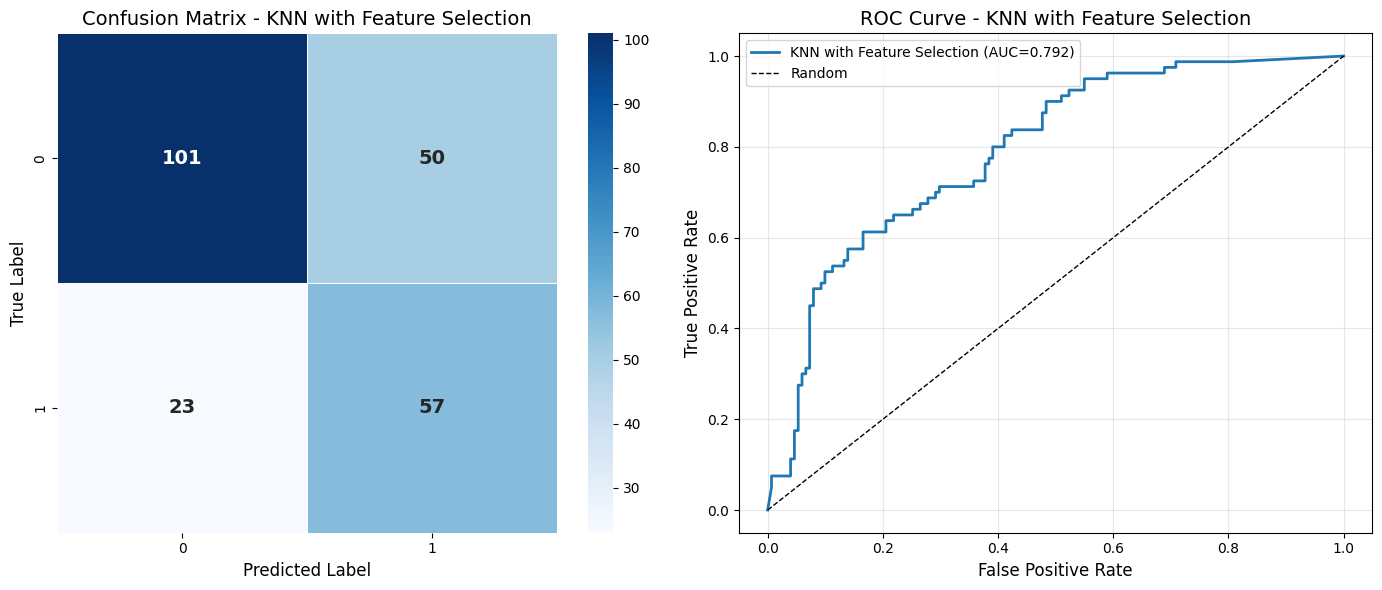

In [21]:
# Get the best parameter and the best score
best_params = grid_search.best_params_
best_score  = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation ROC AUC: {best_score:.2f}")

# Train the model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_smote_selected, y_train_smote)

# Make predictions on the test set
y_pred = best_knn.predict(X_test_selected)
y_pred_prob = best_knn.predict_proba(X_test_selected)[:, 1]

results = classification_evaluate_model(best_knn, X_train_smote_selected, X_test_selected, y_train_smote, y_test, model_name="KNN with Feature Selection", plot=True, verbose=True)

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **Another try to apply different distance metrics**

In [22]:
# Load the dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [23]:
# Feature selection using SelectKBest and f_classif
selector = SelectKBest(f_classif, k=5)
X_train_smote_selected = selector.fit_transform(X_train_smote, y_train_smote)
X_test_selected = selector.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev' , 'hamming'],
    'p': [1, 2]  # Parameter for Minkowski distance, p=1 is Manhattan, p=2 is Euclidean
}

# Set up GridSearchCV with accuracy as the scoring metric
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_smote_selected, y_train_smote)

# Get the best parameter and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.83


Accuracy on Test Set: 0.68
ROC AUC  on Test Set: 0.74
Evaluation results: KNN with Feature Selection and Different Metrics
--------- Accuracy ---------
Training Accuracy : 1.0000
Testing  Accuracy : 0.6753
Balanced Accuracy : 0.6841
Difference        : 0.3247
⚠️ Possible overfitting detected!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.6642
F1 (Micro) : 0.6753

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       151
           1       0.52      0.71      0.60        80

    accuracy                           0.68       231
   macro avg       0.67      0.68      0.66       231
weighted avg       0.71      0.68      0.68       231



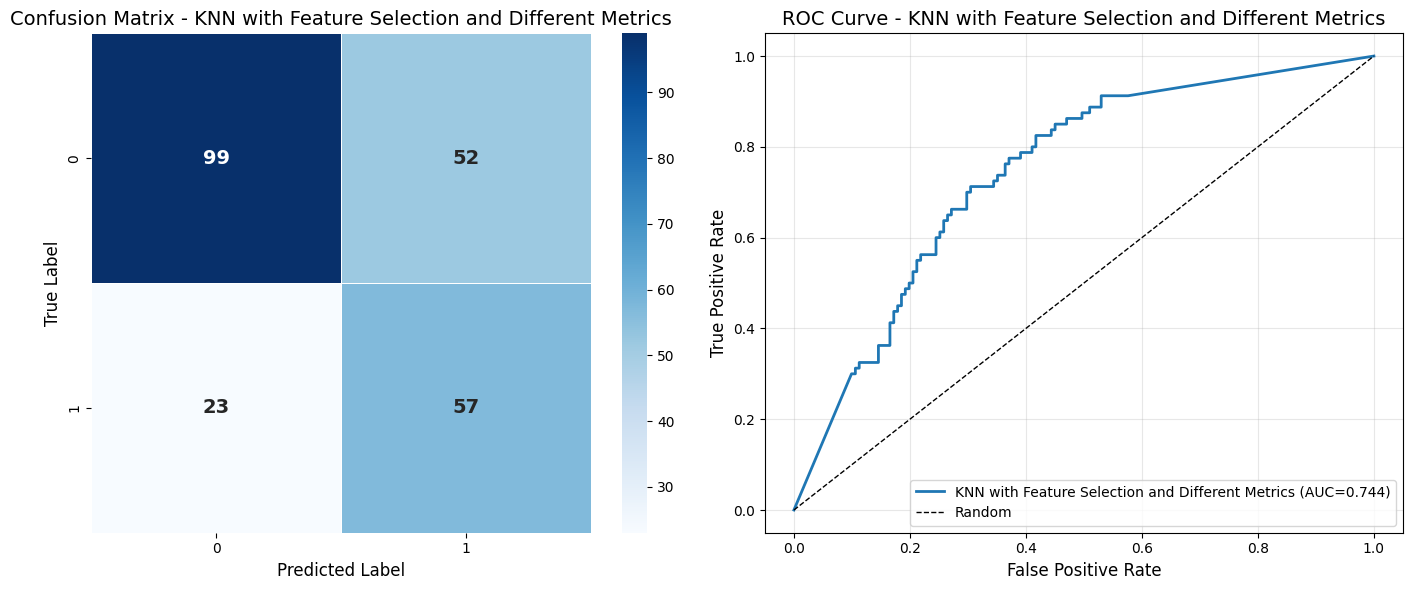

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Train the model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_smote_selected, y_train_smote)

# Make predictions on the test set
y_pred = best_knn.predict(X_test_selected)
y_pred_prob = best_knn.predict_proba(X_test_selected)[:, 1]

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.2f}')

# Evaluate the model using ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC  on Test Set: {roc_auc:.2f}')

results = classification_evaluate_model(best_knn, X_train_smote_selected, X_test_selected, y_train_smote, y_test, model_name="KNN with Feature Selection and Different Metrics", plot=True, verbose=True)   